In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/6 class csv.csv')

Посмотрим 5 первых и последних строк набора данных



In [ ]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Выведем количество строк и столбцов

In [ ]:
print('Dataset has {} number of rows and {} Number of columns'.format ( df.shape[0], df.shape[1]) )

Dataset has 240 number of rows and 7 Number of columns


Выведем информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Выведем характеристики отдельно: типы столбцов

In [ ]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

Описательная статистика

In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Количество нулевых значений

In [ ]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Количество уникальных значений

In [ ]:
df.nunique()

Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
Spectral Class              7
dtype: int64

Построение моделей

Некоторые столбцы являются полностью текстовыми. Как мы знаем, мы не можем использовать текст в данных для обучения модели. Поэтому, прежде чем мы сможем начать процесс, нам нужно эти данные подготовить.

И для преобразования подобных категорий в понятные модели числовые данные мы используем класс LabelEncoder. Таким образом, всё что нам нужно сделать, чтобы получить признак для текстового столбца, это импортировать класс из библиотеки sklearn, обработать колонку функцией fit_transform и заменить существующие текстовые данные новыми закодированными.

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
df['Star color'] = le.fit_transform(df['Star color'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])

Выделяем целевую переменную и факторные переменные и делим выборку на тестовую и тренировочную

In [ ]:
y = df['Spectral Class']
X = df[['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)',	'Star type',	'Star color',	'Spectral Class']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

Обучим модель методом опорных векторов без подбора гиперпараметров

In [ ]:
clf = SVC(C=0.01)
 
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
print("The accuracy of our model on train set: {}".format(clf.score(train_X, train_y)))
print("The accuracy of our model on test set: {}".format(clf.score(test_X, test_y)))
print(classification_report(test_y, y_pred))

The accuracy of our model on train set: 0.4947916666666667
The accuracy of our model on test set: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         2
           5       0.33      1.00      0.50        16
           6       0.00      0.00      0.00        12

    accuracy                           0.33        48
   macro avg       0.07      0.20      0.10        48
weighted avg       0.11      0.33      0.17        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видим, что получилась очень низкая точность. Попробуем осуществить то же самое в цикле, изменяя длину обучающей выборки:

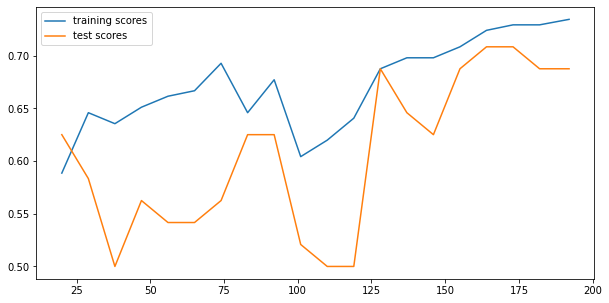

In [ ]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(train_X), 20):
    
    clf = SVC(C=10, kernel='rbf')
    X = train_X[:int(i)]
    Y = train_y[:int(i)]
    clf.fit(X, Y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(train_X, train_y))
    test_scores.append(clf.score(test_X, test_y))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

Видим, что тестовая точность выше обучающей, это говорит о наличии случайных ошибок выборки тестовой модели. Такие ошибки неизбежно присутствуют и могут зашумлять результаты диагностики. 

Теперь попробуем подобрать гиперпараметры с помощью цикла while

In [ ]:
training_scores = []
test_scores = []
numbers = []
i= 0.0001
while i <= 1000000:
    numbers.append(i)
    clf = SVC(C=i, kernel='rbf')
    clf.fit(train_X, train_y)
    training_scores.append(clf.score(train_X, train_y))
    test_scores.append(clf.score(test_X, test_y))
    i += 10000

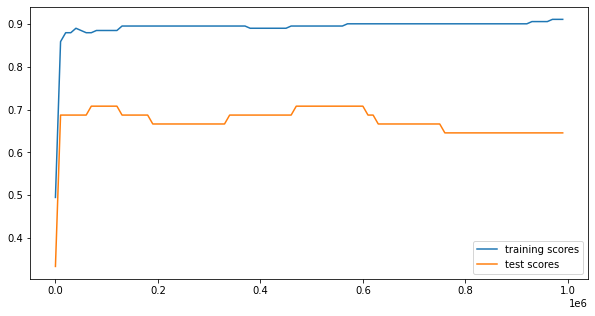

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="lower right")

Если тестовая точность значительно ниже обучающей, это свидетельствует о потенциальном переобучении и потере способности к переобучению. Видим, что переобучение начинается практически с первых итераций цикла, наилучшее С меньше 10000

Попробуем подобрать наилучший гиперпараметр С с помощью функции GridSearchCV

In [ ]:
param_grid = {'C': [1e1, 1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
model1 = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
model1 = model1.fit(train_X, train_y)
y_pred2 = model1.predict(test_X)
print("Best estimator found by grid search:")
print(model1.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best estimator found by grid search:
SVC(C=10.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Получаем наилучшие гиперпараметры модели, посмотрим, как изменилась от этого точность модели:

In [ ]:
print(classification_report(test_y, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.14      0.24        14
           2       0.00      0.00      0.00         2
           5       0.36      1.00      0.52        16
           6       0.00      0.00      0.00        12

    accuracy                           0.38        48
   macro avg       0.20      0.23      0.15        48
weighted avg       0.31      0.38      0.24        48



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Точность стала выше, но незначительно, в целом модель незначима и не может использоваться для решения реальных задач.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
param_grid2 = {'n_estimators': [1,2,5,10,100,500,1000],
              'criterion': ['gini', 'entropy']}
model2 = GridSearchCV(
    RandomForestClassifier(), param_grid2
)
model2 = model2.fit(train_X, train_y)
y_pred3 = model2.predict(test_X)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print("Best estimator found by grid search:")
print(model2.best_estimator_)

Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
print(classification_report(test_y, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



С помощью randome forest мы получили точность 1, что вызывает некоторые сомнения, однако если не брать во внимание поразительную точность, конечно, данная модель получается лучше предыдущих